In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import csv
import pandas as pd

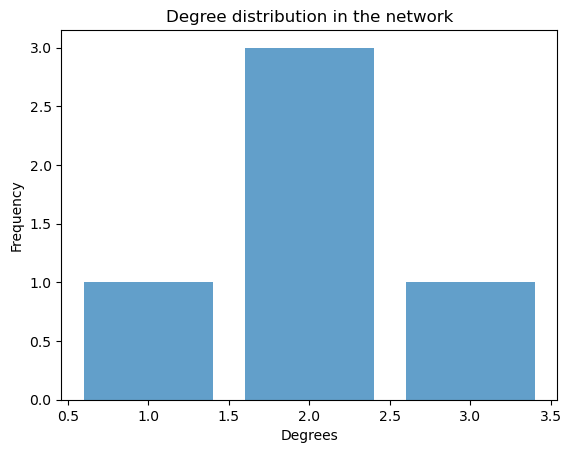

In [5]:
# netowrk data
degrees = {1: 1, 2: 2, 3: 3, 4: 2, 5: 2}

degree_freq = {}
for degree in degrees.values():
    if degree in degree_freq:
        degree_freq[degree] += 1
    else:
        degree_freq[degree] = 1

degree_values = list(degree_freq.keys())
frequency = list(degree_freq.values())

plt.bar(degree_values, frequency, align='center', alpha=0.7)
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.title('Degree distribution in the network')
plt.show()

Epedemics q 1

In [ ]:
def si_model_simulation(N, i, k, initial_infected_proportion, num_simulations, num_steps):
    prevalence_sum = np.zeros(num_steps)
    
    for _ in range(num_simulations):
        # Create an Erdos-Renyi graph
        G = nx.erdos_renyi_graph(N, k / (N - 1))

        # Initialize nodes' states
        states = np.zeros(N)
        initial_infected = int(initial_infected_proportion * N)
        infected_nodes = np.random.choice(N, initial_infected, replace=False)
        states[infected_nodes] = 1  # 1 for infected, 0 for susceptible
        
        # Runtime
        prevalence = []
        for _ in range(num_steps):
            # Calculate prevalence (I/N)
            prevalence.append(np.sum(states) / N)
            
            # Update s nodes
            for node in range(N):
                if states[node] == 0:  # s check
                    infected_neighbors = sum(states[neighbor] for neighbor in G.neighbors(node))
                    if np.random.uniform(0, 1) < i * infected_neighbors:
                        states[node] = 1  # infection
        
        prevalence_sum += np.array(prevalence)
    
    # average prevalence over simulations
    average_prevalence = prevalence_sum / num_simulations
    
    return average_prevalence

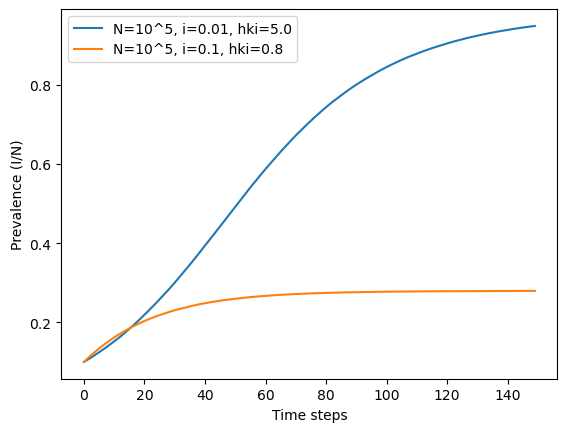

In [21]:
N1 = 10**5
i1 = 0.01
k1 = 5.0
initial_infected_proportion1 = 0.1

N2 = 10**5
i2 = 0.1
k2 = 0.8
initial_infected_proportion2 = 0.1

num_simulations = 5
num_steps = 150

prevalence_case1 = si_model_simulation(N1, i1, k1, initial_infected_proportion1, num_simulations, num_steps)
prevalence_case2 = si_model_simulation(N2, i2, k2, initial_infected_proportion2, num_simulations, num_steps)

time = np.arange(num_steps)
plt.plot(time, prevalence_case1, label='N=10^5, i=0.01, hki=5.0')
plt.plot(time, prevalence_case2, label='N=10^5, i=0.1, hki=0.8')
plt.xlabel('Time steps')
plt.ylabel('Prevalence (I/N)')
plt.legend()
plt.show()

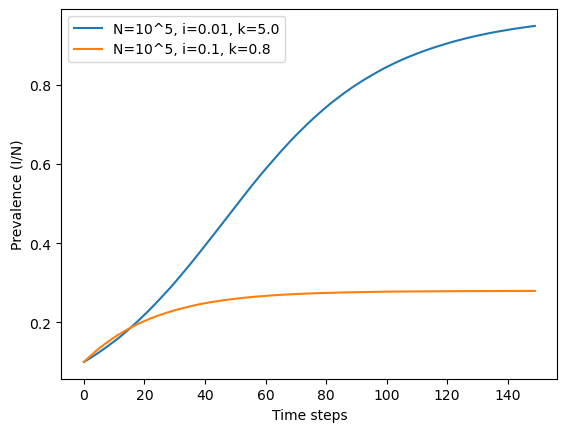

In [24]:
time = np.arange(num_steps)
plt.plot(time, prevalence_case1, label='N=10^5, i=0.01, k=5.0')
plt.plot(time, prevalence_case2, label='N=10^5, i=0.1, k=0.8')
plt.xlabel('Time steps')
plt.ylabel('Prevalence (I/N)')
plt.legend()
plt.show()

In [27]:
def read_csv_to_np_array(file_path):
    df = pd.read_csv(file_path, header=None)  # Read CSV file into a pandas DataFrame
    # Convert DataFrame to NumPy array
    np_array = df.values.astype(float)
    return np_array

In [81]:
prevalence_case1 = read_csv_to_np_array('prevalence_case1.csv')
prevalence_case2 = read_csv_to_np_array('prevalence_case2.csv')

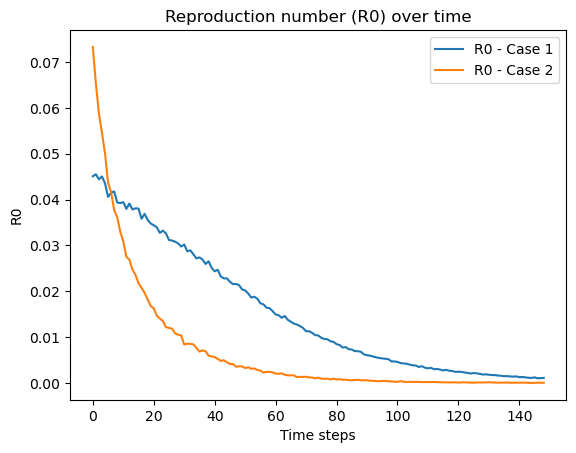

In [29]:
R0_case1 = [(prevalence_case1[i+1] - prevalence_case1[i]) / prevalence_case1[i] for i in range(len(prevalence_case1) - 1)]

R0_case2 = [(prevalence_case2[i+1] - prevalence_case2[i]) / prevalence_case2[i] for i in range(len(prevalence_case2) - 1)]

time_steps = np.arange(len(R0_case1))
plt.plot(time_steps, R0_case1, label='R0 - Case 1')
plt.plot(time_steps, R0_case2, label='R0 - Case 2')
plt.xlabel('Time steps')
plt.ylabel('R0')
plt.legend()
plt.title('Reproduction number (R0) over time')
plt.show()


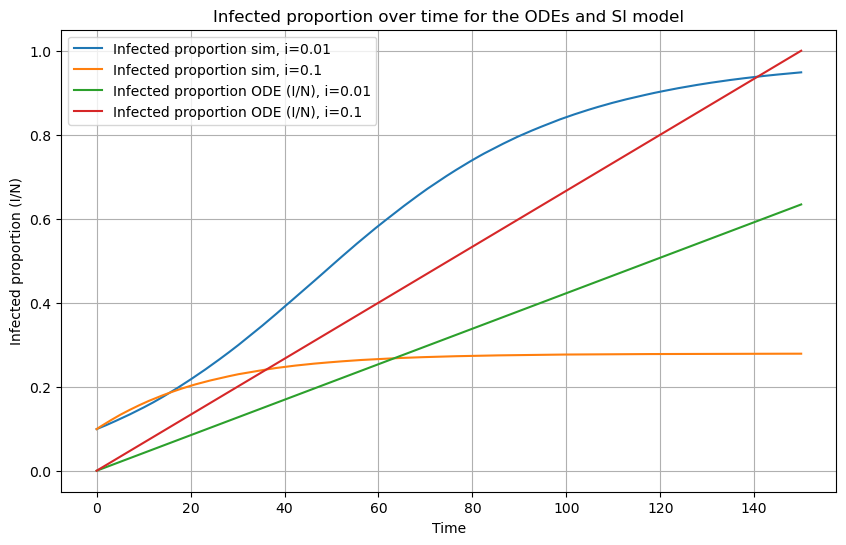

In [123]:
def approximate_SI_values(N, beta, k):
    I = [0.001 * N]      
    S = [N - 0.001 * N] 

    dt = 1 / k  # Time step

    # Perform Euler's method for k steps
    for step in range(k):
        dI_dt = (1 - (1 - beta) **I[-1]) * S[-1]
        dS_dt = -((1 - (1 - beta) **I[-1])) * S[-1]

        new_I = I[-1] + dI_dt * dt
        new_S = S[-1] + dS_dt * dt

        I.append(new_I)
        S.append(new_S)

    return S, I

N = 10**5   # Total population size
k = 149     # Total time steps

beta_01 = 0.01
S_values_01, I_values_01 = approximate_SI_values(N, beta_01, k)

beta_1 = 0.1
S_values_1, I_values_1 = approximate_SI_values(N, beta_1, k)

plt.figure(figsize=(10, 6))
time = np.linspace(0, 150, k+1)  #

plt.plot(time, prevalence_case1, label='Infected proportion sim, i=0.01')
plt.plot(time, prevalence_case2, label='Infected proportion sim, i=0.1')
plt.plot(time, [i / N for i in I_values_01], label='Infected proportion ODE (I/N), i=0.01')
plt.plot(time, [i / N for i in I_values_1], label='Infected proportion ODE (I/N), i=0.1')


plt.xlabel('Time')
plt.ylabel('Infected proportion (I/N)')
plt.title('Infected proportion over time for the ODEs and SI model')
plt.legend()
plt.grid(True)
plt.show()
